In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
df = pd.read_csv("adult.csv")
df1=pd.read_csv("adult.csv")

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df1.shape

(32561, 15)

In [17]:
df1["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [18]:
df1["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [19]:
df1["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

## Here we can we see its showing no null value but in some rows there are "?"

Lets handel that

In [24]:
for i in df.columns:
    non_num=df1[i].isin([" ?"]).sum()
    if non_num>0:
        print(i)
        print(non_num)

workclass
1836
occupation
1843
country
583


In [68]:
df1 = df1.replace(" ?",np.nan)

In [32]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1.workclass = imputer.fit_transform(df1['workclass'].values.reshape(-1,1))[:,0]
df1.occupation = imputer.fit_transform(df1['occupation'].values.reshape(-1,1))[:,0]
df1.country = imputer.fit_transform(df1['country'].values.reshape(-1,1))[:,0]
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
df1 = df.drop(['fnlwgt'],axis=1)
df1["salary"] = df1["salary"].replace({" <=50K":0," >50K":1})
df1 = df1.replace(" ","")
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## EDA

<AxesSubplot:>

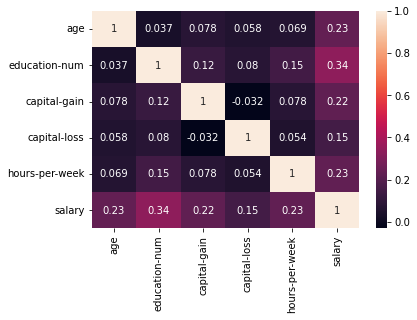

In [83]:
sns.heatmap(df1.corr(),annot=True)

Education-Number(Basically No. of Degrees) and income have cov of 0.34 it means these both attributes are slightly proportional.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

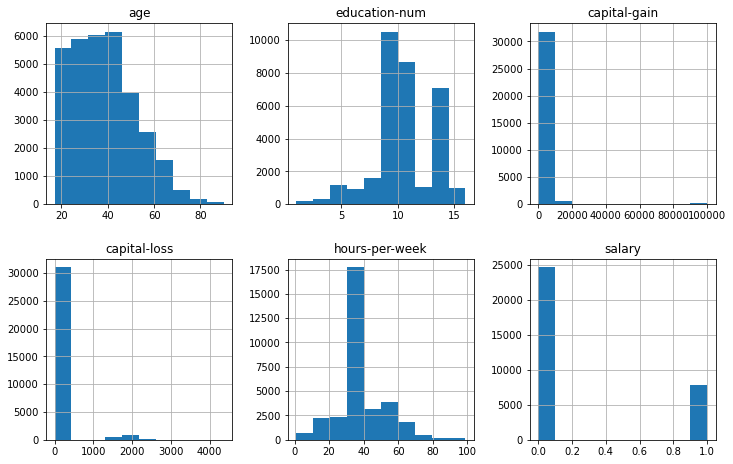

In [84]:
df1.hist(figsize=(12,12), layout=(3,3))

<AxesSubplot:xlabel='count', ylabel='workclass'>

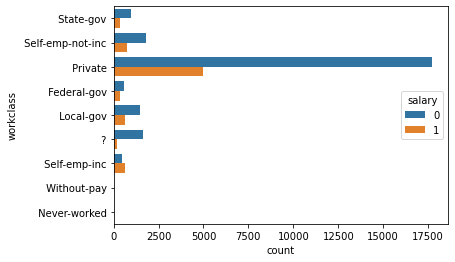

In [85]:
sns.countplot(y="workclass",hue="salary",data=df1)

<AxesSubplot:xlabel='count', ylabel='education'>

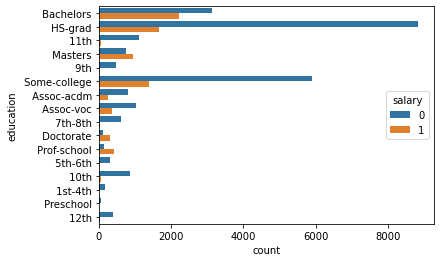

In [86]:
sns.countplot(y="education",hue="salary",data=df1)

<AxesSubplot:xlabel='count', ylabel='education-num'>

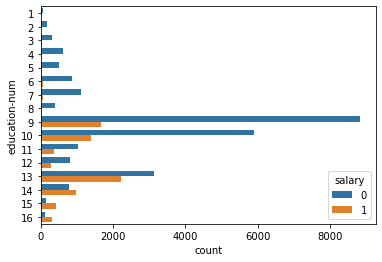

In [87]:
sns.countplot(y="education-num",hue="salary",data=df1)

<AxesSubplot:xlabel='count', ylabel='education-num'>

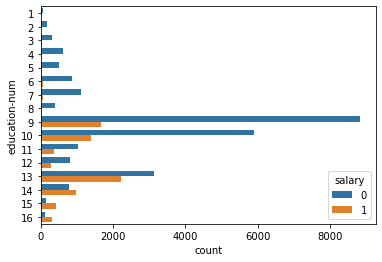

In [88]:
sns.countplot(y="education-num",hue="salary",data=df1)

<AxesSubplot:xlabel='count', ylabel='salary'>

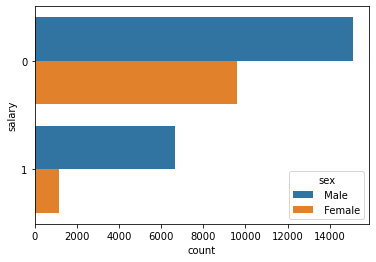

In [89]:
sns.countplot(y="salary",hue="sex",data=df1)

<AxesSubplot:xlabel='count', ylabel='race'>

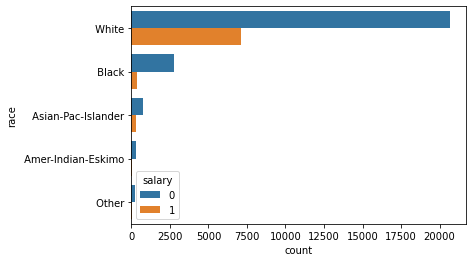

In [90]:
sns.countplot(y="race",hue="salary",data=df1)

From above osbervation people with bachelors degree earn more.



Male are earning more than female

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

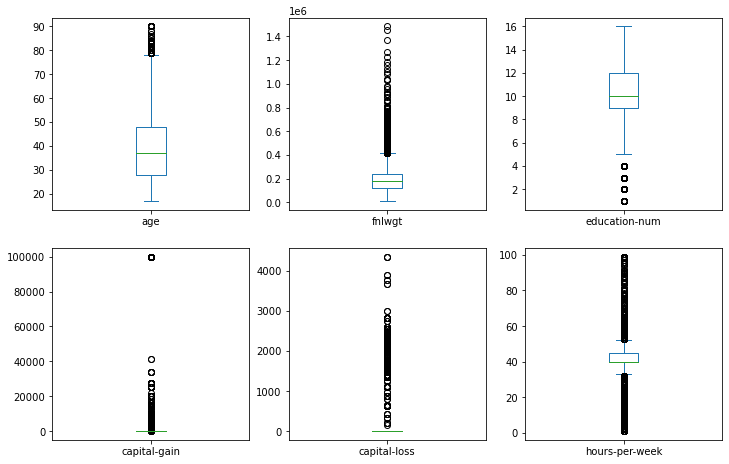

In [91]:
df.plot(kind ='box', figsize=(12,12), layout=(3,3), sharex = False, subplots = True)

Most people ranges in age group of 30 to 50yrs.

most of people have 9-12 degrees/diplomas

Almost all of people working 40 hours per week

few people earning >50K in comparison of who are earning <=50K.

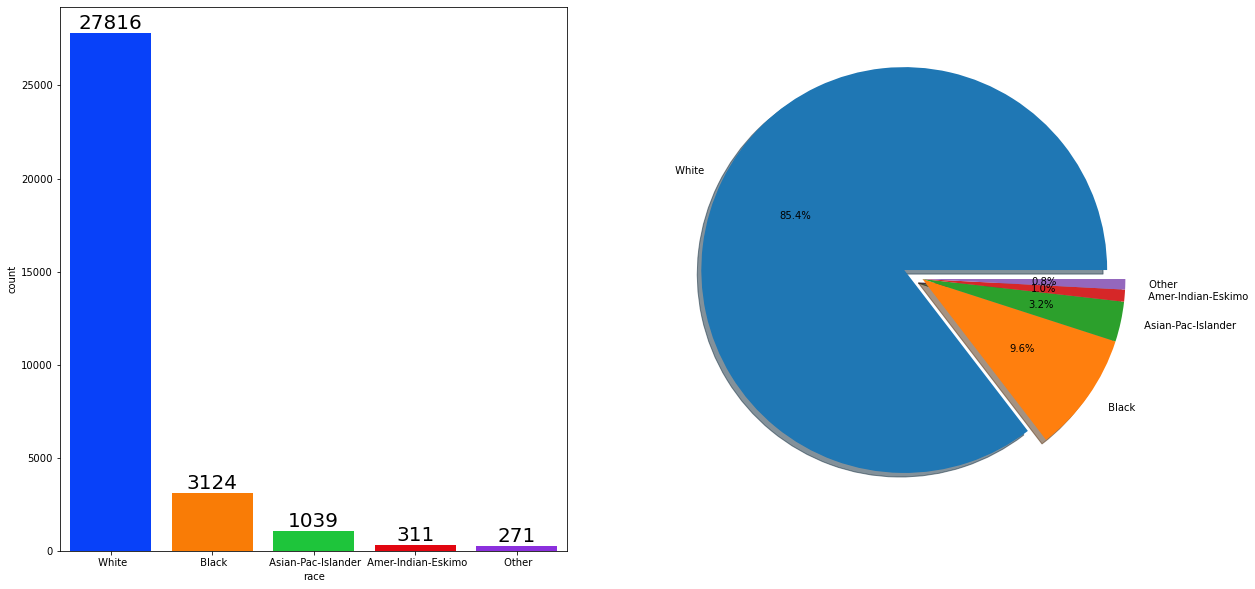

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race'].value_counts(),labels=df['race'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

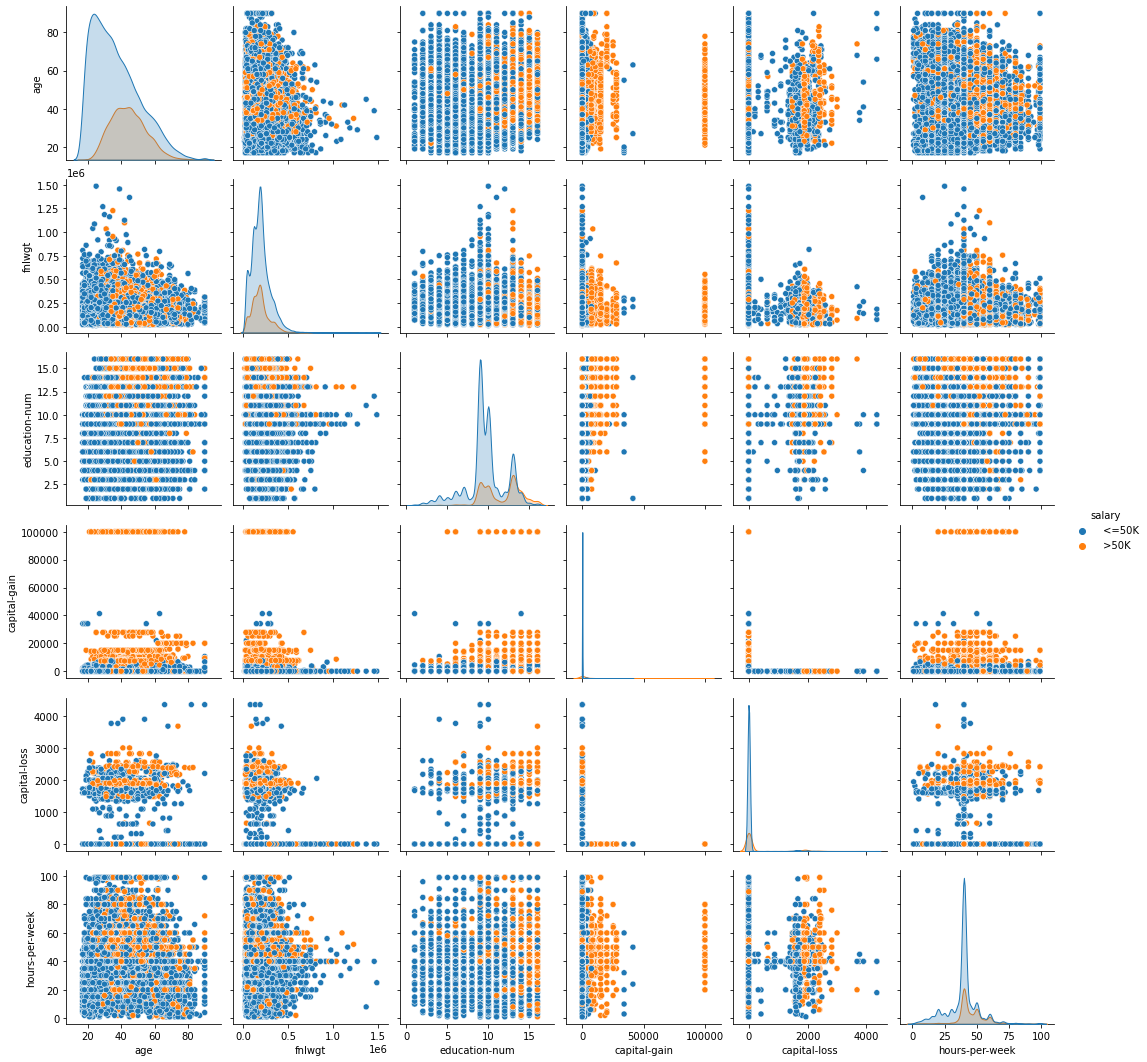

In [93]:
sns.pairplot(df,hue = 'salary')
plt.show()

The column education is just a string representation of the column education-num. We will drop the education column.

In [71]:
df1.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.svm import SVC

